In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as dset
from torchvision import datasets, transforms

In [2]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

GPU State: cuda:0


In [3]:
# Transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3801,))
])

In [4]:
# Data
trainSet = datasets.MNIST(root='data', download=True, train=True, transform=transform)
testSet  = datasets.MNIST(root='data', download=True, train=False, transform=transform)

BatchSize = 100

trainLoader = dset.DataLoader(trainSet, batch_size=BatchSize, shuffle=True)
testLoader = dset.DataLoader(testSet, batch_size=BatchSize, shuffle=False)

In [5]:
print(trainSet.train_data.size())
print(trainSet.train_labels.size())

print(type(trainSet.train_data[0]))
print(type(trainSet.train_labels[0]))

print(trainSet.train_data[0])
print(trainSet.train_labels[0])

torch.Size([60000, 28, 28])
torch.Size([60000])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175

C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\opt\miniconda3\envs\py37\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


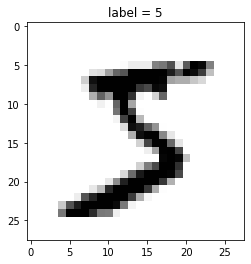

In [6]:
import matplotlib.pyplot as plt

plt.imshow(trainSet.train_data[0].numpy(), cmap='binary')
plt.title('label = %i' % trainSet.train_labels[0])
plt.show()

In [7]:
# Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(in_features=784, out_features=128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10),
            nn.LogSoftmax(dim=1)
        )

    def forward(self, input):
        return self.main(input)


net = Net().to(device)
print(net)

Net(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
    (5): LogSoftmax()
  )
)


In [8]:
# Parameters
epochs = 3
lr = 0.002
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)

In [9]:
# Train
for epoch in range(epochs):
    running_loss = 0.0

    for i, data in enumerate(trainLoader):
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Foward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if (i+1) % BatchSize == 0 or i+1 == len(trainLoader):
            print('[%d/%d, %d/%d] loss: %.3f' % (epoch+1, epochs, i+1, len(trainLoader), running_loss/2000))

print('Training Finished.')

[1/3, 100/600] loss: 0.107
[1/3, 200/600] loss: 0.172
[1/3, 300/600] loss: 0.205
[1/3, 400/600] loss: 0.229
[1/3, 500/600] loss: 0.249
[1/3, 600/600] loss: 0.268
[2/3, 100/600] loss: 0.018
[2/3, 200/600] loss: 0.034
[2/3, 300/600] loss: 0.051
[2/3, 400/600] loss: 0.066
[2/3, 500/600] loss: 0.081
[2/3, 600/600] loss: 0.095
[3/3, 100/600] loss: 0.013
[3/3, 200/600] loss: 0.027
[3/3, 300/600] loss: 0.039
[3/3, 400/600] loss: 0.052
[3/3, 500/600] loss: 0.065
[3/3, 600/600] loss: 0.076
Training Finished.


In [10]:
# Test
correct = 0
total = 0

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100*correct / total))

class_correct = [0 for i in range(10)]
class_total = [0 for i in range(10)]

with torch.no_grad():
    for data in testLoader:
        inputs, labels = data[0].to(device), data[1].to(device)
        inputs = inputs.view(inputs.shape[0], -1)

        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(10):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1
            print(class_correct)
            print(class_total)

for i in range(10):
    print('Accuracy of %d: %3f' % (i, (class_correct[i]/class_total[i])))

Accuracy of the network on the 10000 test images: 93 %
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 1, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 1, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 0]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 1, 0, 1, 0, 1]
[1, 2, 1, 0, 2, 0, 0, 1, 0, 2]
[1, 2, 1, 0, 2, 1, 0, 1, 0, 2]
[1, 2, 1, 0, 2, 0, 1, 1, 0, 2]
[1, 2, 1, 0, 2, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 0, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 2, 2, 1, 1, 0, 2]
[2, 2, 1, 0, 3, 1, 1, 1, 0, 2]
[2, 2, 1, 0, 3, 2, 1, 1, 0, 2]
[2, 2, 1, 0, 3, 1, 1, 1, 0, 3]
[2, 2, 1, 0, 3, 2, 1, 1, 0, 3]
[2, 2, 1, 0, 3,

[14, 20, 15, 13, 16, 8, 12, 12, 11, 18]
[14, 20, 16, 15, 18, 11, 12, 14, 13, 19]
[14, 20, 15, 13, 16, 8, 12, 12, 12, 18]
[14, 20, 16, 15, 18, 11, 12, 14, 14, 19]
[14, 20, 15, 14, 16, 8, 12, 12, 12, 18]
[14, 20, 16, 16, 18, 11, 12, 14, 14, 19]
[15, 20, 15, 14, 16, 8, 12, 12, 12, 18]
[15, 20, 16, 16, 18, 11, 12, 14, 14, 19]
[15, 20, 15, 14, 16, 8, 12, 13, 12, 18]
[15, 20, 16, 16, 18, 11, 12, 15, 14, 19]
[15, 20, 16, 14, 16, 8, 12, 13, 12, 18]
[15, 20, 17, 16, 18, 11, 12, 15, 14, 19]
[15, 20, 16, 14, 16, 8, 12, 14, 12, 18]
[15, 20, 17, 16, 18, 11, 12, 16, 14, 19]
[15, 20, 16, 14, 16, 8, 12, 14, 12, 19]
[15, 20, 17, 16, 18, 11, 12, 16, 14, 20]
[15, 20, 16, 14, 17, 8, 12, 14, 12, 19]
[15, 20, 17, 16, 19, 11, 12, 16, 14, 20]
[15, 20, 16, 15, 17, 8, 12, 14, 12, 19]
[15, 20, 17, 17, 19, 11, 12, 16, 14, 20]
[15, 20, 16, 16, 17, 8, 12, 14, 12, 19]
[15, 20, 17, 18, 19, 11, 12, 16, 14, 20]
[15, 20, 16, 16, 17, 8, 13, 14, 12, 19]
[15, 20, 17, 18, 19, 11, 13, 16, 14, 20]
[15, 21, 16, 16, 17, 8, 13, 

[28, 34, 27, 32, 38, 22, 24, 30, 25, 28]
[28, 34, 29, 36, 41, 25, 25, 33, 27, 33]
[28, 34, 27, 32, 38, 22, 24, 31, 25, 28]
[28, 34, 29, 36, 41, 25, 25, 34, 27, 33]
[28, 34, 27, 32, 38, 23, 24, 31, 25, 28]
[28, 34, 29, 36, 41, 26, 25, 34, 27, 33]
[28, 34, 27, 32, 38, 23, 24, 32, 25, 28]
[28, 34, 29, 36, 41, 26, 25, 35, 27, 33]
[28, 34, 27, 33, 38, 23, 24, 32, 25, 28]
[28, 34, 29, 37, 41, 26, 25, 35, 27, 33]
[28, 34, 28, 33, 38, 23, 24, 32, 25, 28]
[28, 34, 30, 37, 41, 26, 25, 35, 27, 33]
[28, 34, 29, 33, 38, 23, 24, 32, 25, 28]
[28, 34, 31, 37, 41, 26, 25, 35, 27, 33]
[28, 34, 29, 33, 38, 23, 24, 33, 25, 28]
[28, 34, 31, 37, 41, 26, 25, 36, 27, 33]
[28, 34, 29, 34, 38, 23, 24, 33, 25, 28]
[28, 34, 31, 38, 41, 26, 25, 36, 27, 33]
[28, 34, 29, 34, 38, 23, 24, 34, 25, 28]
[28, 34, 31, 38, 41, 26, 25, 37, 27, 33]
[28, 34, 29, 34, 38, 23, 24, 34, 25, 29]
[28, 34, 31, 38, 41, 26, 25, 37, 27, 34]
[28, 34, 30, 34, 38, 23, 24, 34, 25, 29]
[28, 34, 32, 38, 41, 26, 25, 37, 27, 34]
[28, 34, 30, 34,

[41, 52, 47, 47, 44, 31, 40, 46, 40, 45]
[41, 54, 50, 52, 47, 37, 42, 52, 44, 53]
[41, 52, 47, 47, 44, 31, 41, 46, 40, 45]
[41, 54, 50, 52, 47, 37, 43, 52, 44, 53]
[41, 52, 47, 48, 44, 31, 41, 46, 40, 45]
[41, 54, 50, 53, 47, 37, 43, 52, 44, 53]
[41, 52, 47, 48, 44, 31, 42, 46, 40, 45]
[41, 54, 50, 53, 47, 37, 44, 52, 44, 53]
[41, 52, 48, 48, 44, 31, 42, 46, 40, 45]
[41, 54, 51, 53, 47, 37, 44, 52, 44, 53]
[41, 52, 48, 48, 44, 31, 42, 46, 40, 46]
[41, 54, 51, 53, 47, 37, 44, 52, 44, 54]
[41, 52, 48, 48, 44, 31, 42, 46, 41, 46]
[41, 54, 51, 53, 47, 37, 44, 52, 45, 54]
[41, 53, 48, 48, 44, 31, 42, 46, 41, 46]
[41, 55, 51, 53, 47, 37, 44, 52, 45, 54]
[41, 53, 49, 48, 44, 31, 42, 46, 41, 46]
[41, 55, 52, 53, 47, 37, 44, 52, 45, 54]
[41, 53, 49, 48, 44, 31, 42, 47, 41, 46]
[41, 55, 52, 53, 47, 37, 44, 53, 45, 54]
[41, 53, 50, 48, 44, 31, 42, 47, 41, 46]
[41, 55, 53, 53, 47, 37, 44, 53, 45, 54]
[41, 53, 50, 49, 44, 31, 42, 47, 41, 46]
[41, 55, 53, 54, 47, 37, 44, 53, 45, 54]
[41, 53, 50, 49,

[55, 69, 62, 66, 60, 43, 57, 59, 54, 63]
[55, 71, 65, 72, 64, 49, 59, 66, 60, 71]
[55, 69, 62, 66, 60, 43, 57, 59, 54, 64]
[55, 71, 65, 72, 64, 49, 59, 66, 60, 72]
[55, 69, 62, 66, 60, 43, 57, 59, 54, 65]
[55, 71, 65, 72, 64, 49, 59, 66, 60, 73]
[55, 69, 62, 66, 60, 43, 57, 59, 55, 65]
[55, 71, 65, 72, 64, 49, 59, 66, 61, 73]
[55, 69, 63, 66, 60, 43, 57, 59, 55, 65]
[55, 71, 66, 72, 64, 49, 59, 66, 61, 73]
[55, 69, 63, 66, 60, 43, 57, 60, 55, 65]
[55, 71, 66, 72, 64, 49, 59, 67, 61, 73]
[55, 69, 63, 66, 60, 43, 57, 61, 55, 65]
[55, 71, 66, 72, 64, 49, 59, 68, 61, 73]
[55, 70, 63, 66, 60, 43, 57, 61, 55, 65]
[55, 72, 66, 72, 64, 49, 59, 68, 61, 73]
[56, 70, 63, 66, 60, 43, 57, 61, 55, 65]
[56, 72, 66, 72, 64, 49, 59, 68, 61, 73]
[56, 70, 63, 66, 60, 43, 57, 61, 55, 65]
[57, 72, 66, 72, 64, 49, 59, 68, 61, 73]
[56, 70, 63, 66, 60, 43, 57, 61, 55, 66]
[57, 72, 66, 72, 64, 49, 59, 68, 61, 74]
[56, 70, 63, 66, 60, 43, 58, 61, 55, 66]
[57, 72, 66, 72, 64, 49, 60, 68, 61, 74]
[56, 70, 63, 66,

[68, 90, 77, 80, 72, 57, 72, 74, 71, 79]
[69, 92, 81, 87, 76, 64, 74, 81, 78, 88]
[68, 90, 77, 80, 72, 57, 72, 74, 71, 79]
[69, 93, 81, 87, 76, 64, 74, 81, 78, 88]
[68, 90, 77, 80, 72, 57, 72, 74, 72, 79]
[69, 93, 81, 87, 76, 64, 74, 81, 79, 88]
[68, 90, 77, 80, 72, 57, 72, 75, 72, 79]
[69, 93, 81, 87, 76, 64, 74, 82, 79, 88]
[68, 90, 77, 80, 72, 57, 72, 76, 72, 79]
[69, 93, 81, 87, 76, 64, 74, 83, 79, 88]
[68, 90, 77, 80, 72, 57, 73, 76, 72, 79]
[69, 93, 81, 87, 76, 64, 75, 83, 79, 88]
[68, 90, 77, 81, 72, 57, 73, 76, 72, 79]
[69, 93, 81, 88, 76, 64, 75, 83, 79, 88]
[68, 90, 77, 81, 72, 57, 74, 76, 72, 79]
[69, 93, 81, 88, 76, 64, 76, 83, 79, 88]
[69, 90, 77, 81, 72, 57, 74, 76, 72, 79]
[70, 93, 81, 88, 76, 64, 76, 83, 79, 88]
[69, 90, 77, 81, 72, 57, 74, 77, 72, 79]
[70, 93, 81, 88, 76, 64, 76, 84, 79, 88]
[69, 90, 78, 81, 72, 57, 74, 77, 72, 79]
[70, 93, 82, 88, 76, 64, 76, 84, 79, 88]
[69, 90, 78, 81, 73, 57, 74, 77, 72, 79]
[70, 93, 82, 88, 77, 64, 76, 84, 79, 88]
[69, 90, 78, 81,

[75, 107, 93, 98, 87, 64, 83, 97, 84, 95]
[76, 110, 98, 106, 92, 71, 85, 105, 92, 104]
[75, 107, 94, 98, 87, 64, 83, 97, 84, 95]
[76, 110, 99, 106, 92, 71, 85, 105, 92, 104]
[75, 107, 94, 98, 87, 65, 83, 97, 84, 95]
[76, 110, 99, 106, 92, 72, 85, 105, 92, 104]
[75, 108, 94, 98, 87, 65, 83, 97, 84, 95]
[76, 111, 99, 106, 92, 72, 85, 105, 92, 104]
[75, 108, 94, 98, 87, 65, 83, 97, 85, 95]
[76, 111, 99, 106, 92, 72, 85, 105, 93, 104]
[75, 108, 94, 98, 87, 65, 84, 97, 85, 95]
[76, 111, 99, 106, 92, 72, 86, 105, 93, 104]
[75, 108, 94, 98, 87, 65, 84, 97, 85, 96]
[76, 111, 99, 106, 92, 72, 86, 105, 93, 105]
[76, 108, 94, 98, 87, 65, 84, 97, 85, 96]
[77, 111, 99, 106, 92, 72, 86, 105, 93, 105]
[76, 108, 94, 98, 88, 65, 84, 97, 85, 96]
[77, 111, 99, 106, 93, 72, 86, 105, 93, 105]
[76, 109, 94, 98, 88, 65, 84, 97, 85, 96]
[77, 112, 99, 106, 93, 72, 86, 105, 93, 105]
[76, 109, 94, 98, 88, 65, 84, 97, 85, 97]
[77, 112, 99, 106, 93, 72, 86, 105, 93, 106]
[76, 109, 94, 99, 88, 65, 84, 97, 85, 97]
[